In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Washington (WA) — Lincoln, Okanogan, Skagit, Spokane, Whitman

#### Reading Report_Generator (including loss ratio data) file for WA
Annual summary relating to insurance — one (or sometimes no) entry per county per year 

In [2]:
df_insurance_WA = pd.read_excel("Data_KS_WA/WA/WA_Report_Generator.xlsx")
df_insurance_WA.head()

,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
0,1989,All Other Commodities,WA,Okanogan,1,1,0,2,0,122,...,0,10417,987,168,0,0,0,0,0.094748,0.000000
1,1989,All Other Commodities,WA,Skagit,2,2,0,2,0,147,...,0,14586,604,136,0,0,0,0,0.041409,0.000000
2,1989,WHEAT,WA,Lincoln,747,747,431,1481,695,200126,...,0,22702070,870493,150821,1709526,0,0,0,0.038344,1.963859
3,1989,WHEAT,WA,Spokane,132,132,31,235,39,19065,...,0,2503169,106985,19320,76808,0,0,0,0.042739,0.717932
4,1989,WHEAT,WA,Whitman,1215,1215,353,2062,470,280461,...,0,40049559,1117467,193273,1378891,0,0,0,0.027902,1.233943


#### Reading agricultural production data for WA
Annual summary relating to wheat production, measured in bushels (BU) — one (or sometimes no) entry per county per year 

In [10]:
df_production_WA = pd.read_csv("Data_KS_WA/WA/WA_Agriculture/WA_County_Production_Bushels.csv")

df_production_WA_select = df_production_WA[['County','Value']]
df_production_WA_select.rename(columns={'Value':'Bushels'}, inplace=True)
df_production_WA_select.head()

,County,Bushels
0,OKANOGAN,"325,232"
1,LINCOLN,"21,544,831"
2,SPOKANE,"7,141,746"
3,WHITMAN,"37,682,051"
4,SKAGIT,"269,588"


### Kansas (KS) — Grant, Gray, Haskell, Kearny, Morton

#### Reading Report_Generator file for KS

In [13]:
df_insurance_KS = pd.read_excel("Data_KS_WA/KS/KS_Report_Generator.xlsx")
df_insurance_KS.head()

,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
0,1989,WHEAT,KS,Grant,49,47,28,145,71,10051,...,0,685702,71500,21381,158457,0,0,0,0.104272,2.216181
1,1989,WHEAT,KS,Gray,129,126,76,251,124,20935,...,0,1229482,127161,37941,365098,0,0,0,0.103426,2.871147
2,1989,WHEAT,KS,Haskell,75,71,34,181,73,13570,...,0,969071,80135,23696,131035,0,0,0,0.082692,1.635178
3,1989,WHEAT,KS,Kearny,63,57,28,182,42,15541,...,0,921050,116608,34732,87687,0,0,0,0.126603,0.751980
4,1989,WHEAT,KS,Morton,74,72,57,280,197,20192,...,0,1193355,138764,40781,441029,0,0,0,0.116280,3.178266


#### Reading agricultural production data for KS

In [15]:
df_production_KS = pd.read_csv("Data_KS_WA/KS/KS_Agriculture/KS_County_Production_Bushels.csv")

df_production_KS_select = df_production_KS[['County','Value']]
df_production_KS_select.rename(columns={'Value':'Bushels'}, inplace=True)
df_production_KS_select.head()

,County,Bushels
0,GRANT,"2,692,012"
1,GRAY,"5,193,430"
2,HASKELL,"2,536,394"
3,KEARNY,"3,791,619"
4,MORTON,"2,400,827"


## Plots
Color palettes: https://python-graph-gallery.com/100-calling-a-color-with-seaborn/   
Plot types: https://seaborn.pydata.org/tutorial/regression.html  
Data distribution visuals: https://seaborn.pydata.org/generated/seaborn.jointplot.html  
Note — by default, shaded areas of the plot represent the 95% confidence interval for (the slope of) that regression 

### Washington (WA)

Indemnity ($) vs. Loss Ratio

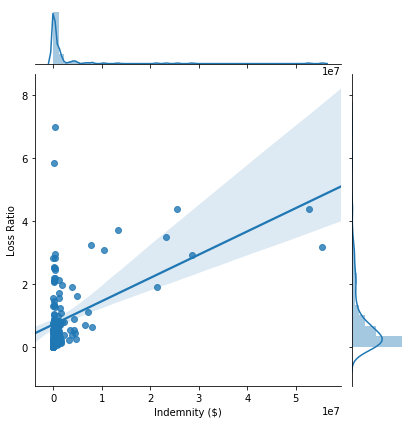

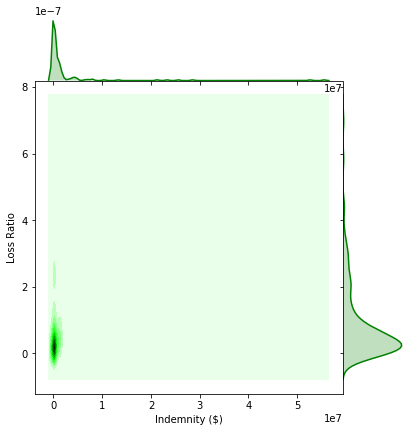

In [26]:
# Depicts relationship between indemnity and loss ratio, as well as the spread of each variable
sns.jointplot(x="Indemnity ($)", y="Loss Ratio", data=df_insurance_WA[['Indemnity ($)', 'Loss Ratio']], kind="reg")

# Replacing the scatterplots and histograms with density estimates 
sns.jointplot(x="Indemnity ($)", y="Loss Ratio", data=df_insurance_WA[['Indemnity ($)', 'Loss Ratio']], kind="kde", space=0, color="g")

Total Premium ($) vs. Loss Ratio

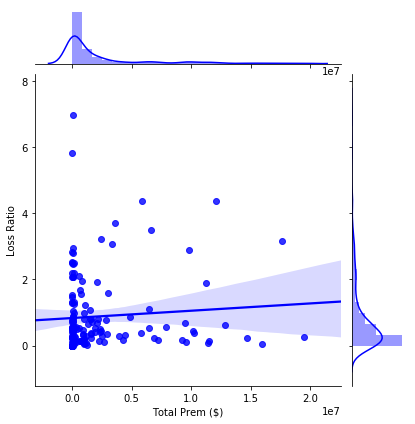

In [22]:
# Depicts relationship between total premium and loss ratio, as well as the spread of each variable
sns.jointplot(x="Total Prem ($)", y="Loss Ratio", data=df_insurance_WA[['Total Prem ($)', 'Loss Ratio']], kind="reg", color='b')


Liabilities ($) vs. Loss Ratio

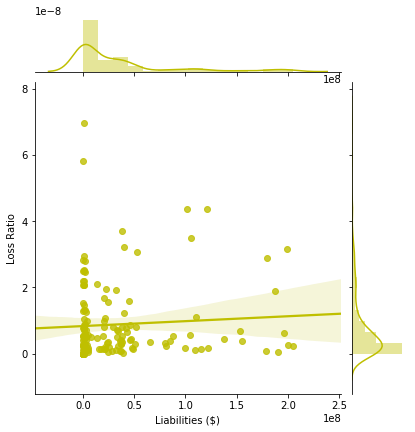

In [24]:
# Depicts relationship between liabilities and loss ratio, as well as the spread of each variable
sns.jointplot(x="Liabilities ($)", y="Loss Ratio", data=df_insurance_WA[['Liabilities ($)', 'Loss Ratio']], kind="reg", color='y')


#### County-by-county analyses for WA 
Such analyses are likely more informative than the ones considering WA counties together, as they have differing indemnity values (gradient)

In [ ]:
# Regression lines are color-coded by county


### Kansas (KS)

#### County-by-county analyses for KS
We hypothesize that since these counties have similar indemnity values, these analyses may be similar to the ones encompassing all KS counties (no gradient)